In [1]:
# Write recipe outputs
#finaldf2_models = dataiku.Dataset("finaldf2_models")
#finaldf2_models.write_with_schema(finaldf2_models_df)

# Code pipeline models

## Import packages

In [2]:
#Need version 1.19.5 of numpy for first part of code, need newer version for second part of code

In [3]:
pip list

Package            Version
------------------ -----------------
attrs              23.1.0
backcall           0.2.0
certifi            2023.5.7
charset-normalizer 3.1.0
click              8.1.3
click-plugins      1.1.1
cligj              0.7.2
cloudpickle        1.5.0
cycler             0.11.0
decorator          5.1.1
Fiona              1.9.3
Flask              1.0.4
geopandas          0.4.0
idna               3.4
imbalanced-learn   0.10.1
imblearn           0.0
importlib-metadata 6.6.0
ipykernel          4.8.2
ipython            7.34.0
ipython-genutils   0.2.0
itsdangerous       2.1.2
jedi               0.18.2
Jinja2             2.10.3
joblib             1.2.0
jupyter-client     6.1.12
jupyter_core       4.12.0
kiwisolver         1.4.4
lightgbm           3.2.1
MarkupSafe         2.0.1
matplotlib         3.1.2
matplotlib-inline  0.1.6
munch              3.0.0
notebook           5.7.16-dku-11.0-0
numpy              1.17.3
packaging          23.1
pandas             1.0.5
parso            

In [4]:
import numpy as np
print(np.__version__)

1.17.3


In [5]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

# Read recipe inputs
finaldf2 = dataiku.Dataset("finaldf2")
finaldf2_df = finaldf2.get_dataframe()


# Compute recipe outputs from inputs
# TODO: Replace this part by your actual code that computes the output, as a Pandas dataframe
# NB: DSS also supports other kinds of APIs for reading and writing data. Please see doc.

finaldf2_models_df = finaldf2_df # For this sample code, simply copy input to output

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, average_precision_score
from sklearn import metrics, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.compose import ColumnTransformer
#from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

from xgboost import XGBClassifier


# # pip install imblearn
# # pip install sklego

# import imblearn
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
# from collections import Counter
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# # !pip install feature_engine
# from feature_engine.creation import CyclicalFeatures
# # !pip install tensorflow
# # !pip install keras

# from keras.models import Sequential, Model
# from keras.layers import Input, Dense, Activation
# from keras.optimizers import Adam

# #Setting up matplotlib for plots
# %matplotlib inline

# np.random.seed(42)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:156: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inline_support()`
  configure_inline_support(ip, backend)


In [7]:
finaldf2

Column,Type
Gemeente,string
beschikbare_capaciteit_afname_huidig_mva_count,string
BAG ID,string
Bouwjaar,string
Gemeentenaam2021,string
Oppervlakte [m2],string
Potentie jaarlijks opwek [kWh],string
SDE_status,string
Wijk,string
a_bed_a,string


In [8]:
#drop where 2020 is yes, so that only no yes and no no remain
#Final4_df = Final4_df[Final4_df.zonnepanelen2020_ja != 1]

# Train-Test split

In [9]:
df = finaldf2_df.drop(['BAG ID','Gemeente', 'Gemeentenaam2021', 'Wijk'], axis=1)

In [10]:
df

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],SDE_status,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.0,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.0,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,1.0,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,1.0,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,1.0,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,1.0,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,1.0,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
df.replace('.', np.nan)

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],SDE_status,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.0,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.0,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,1.0,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,1.0,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,1.0,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,1.0,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,1.0,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
df.dropna()

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],SDE_status,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.0,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.0,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,1.0,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,1.0,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,1.0,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,1.0,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,1.0,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
df.isin(['.']).sum(axis=0)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


beschikbare_capaciteit_afname_huidig_mva_count    0
Bouwjaar                                          0
Oppervlakte [m2]                                  0
Potentie jaarlijks opwek [kWh]                    0
SDE_status                                        0
a_bed_a                                           0
a_bed_bf                                          0
a_bed_gi                                          0
a_bed_hj                                          0
a_bed_kl                                          0
a_bed_mn                                          0
a_bed_oq                                          0
a_bed_ru                                          0
a_bedv                                            0
a_inw                                             0
a_man                                             0
a_nw_all                                          0
beschermdstadgezicht_ja                           0
bev_dich                                          0
g_ele       

In [14]:
df = df.replace('\.+', np.nan, regex=True)

<>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-14-f16288392f7c>:1: DeprecationWarning: invalid escape sequence \.
  df = df.replace('\.+', np.nan, regex=True)


In [15]:
df.dropna()

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],SDE_status,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.0,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.0,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,1.0,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,1.0,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,1.0,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,1.0,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,1.0,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,1.0,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
df.isin(['.']).sum(axis=0)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


beschikbare_capaciteit_afname_huidig_mva_count    0
Bouwjaar                                          0
Oppervlakte [m2]                                  0
Potentie jaarlijks opwek [kWh]                    0
SDE_status                                        0
a_bed_a                                           0
a_bed_bf                                          0
a_bed_gi                                          0
a_bed_hj                                          0
a_bed_kl                                          0
a_bed_mn                                          0
a_bed_oq                                          0
a_bed_ru                                          0
a_bedv                                            0
a_inw                                             0
a_man                                             0
a_nw_all                                          0
beschermdstadgezicht_ja                           0
bev_dich                                          0
g_ele       

In [17]:
X = df.drop(['sp_change'], axis = 1)
y = df['sp_change']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(30478, 34)
(7620, 34)


# Model without pipeline

In [20]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [21]:
# X_train = X_train.values.astype(np.float)
# y_train = y_train.values.astype(np.float)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [23]:
#test from website

def print_binary_evaluation(X_train, X_test,y_train, y_true, strategy):
    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

In [24]:
# df = df.drop(['SDE_status'], axis = 1)

In [25]:
print_binary_evaluation(X_train, X_test, y_train, y_test, 'most_frequent')

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.9334645669291338,
 'recall': 0.0,
 'precision': 0.0,
 'f1_score': 0.0}

In [26]:
print_binary_evaluation(X_train, X_test,y_train, y_test, 'stratified')

{'accuracy': 0.8730971128608924,
 'recall': 0.07297830374753451,
 'precision': 0.06928838951310862,
 'f1_score': 0.07108549471661864}

In [27]:
X_train = X_train.dropna()

In [42]:
X_train.shape

(30478, 34)

In [43]:
y_train.shape

(30477,)

In [30]:
# X = X.transpose()

In [31]:
y_train = y_train.drop(labels=0, axis=0)

In [32]:
X_test.isnull().sum()

beschikbare_capaciteit_afname_huidig_mva_count    0
Bouwjaar                                          0
Oppervlakte [m2]                                  0
Potentie jaarlijks opwek [kWh]                    0
SDE_status                                        0
a_bed_a                                           0
a_bed_bf                                          0
a_bed_gi                                          0
a_bed_hj                                          0
a_bed_kl                                          0
a_bed_mn                                          0
a_bed_oq                                          0
a_bed_ru                                          0
a_bedv                                            0
a_inw                                             0
a_man                                             0
a_nw_all                                          0
beschermdstadgezicht_ja                           0
bev_dich                                          0
g_ele       

In [33]:
X_test = X_test.dropna()

In [34]:
X_test.shape

(7620, 34)

In [35]:
y_test.shape

(7620,)

In [36]:
y_test

16735    0
12346    0
12830    0
14453    0
584      0
        ..
30617    0
37236    0
14768    0
35007    0
35785    0
Name: sp_change, Length: 7620, dtype: int64

In [45]:
#y_test = y_test.drop(labels=13246)
X_train = X_train.drop(labels=30477)

In [145]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
print('Training set score: ' + str(lr.score(X_train,y_train)))
print('Test set score: ' + str(lr.score(X_test,y_test)))


Training set score: 0.9325392919250582
Test set score: 0.9334645669291338


# Function Grid search and Evaluation metrics

In [47]:
#Helper functions
def pipe_fit(pipeline, param_grid, X_train, y_train):
    grid = GridSearchCV(pipeline, param_grid, scoring = ["accuracy", "f1_macro", "roc_auc", "average_precision"], cv = 3, refit="average_precision")
    grid.get_params().keys()
    grid.fit(X_train, y_train)

    print("CV Accuracy Score: ", np.mean(grid.cv_results_['mean_test_accuracy']))
    print("CV F1 Macro Score: ", np.mean(grid.cv_results_['mean_test_f1_macro']))
    print("CV Average Precision Score: ", np.mean(grid.cv_results_['mean_test_average_precision']))
    print("CV ROC AUC Score: ", np.mean(grid.cv_results_['mean_test_roc_auc']))
    print("Best parameters: {}".format(grid.best_params_))
    print("Train score: {:.5f}".format(grid.score(X_train, y_train)))
#     print(pipeline.named_steps['classification'])
    return grid

def evaluate_on_test(X_test, y_test, model, model_type):
    y_score_1 = model.predict_proba(X_test)[:,1]
    y_score_0 = model.predict_proba(X_test)[:,0]
    y_pred = model.predict(X_test)
    print("Test Average Precision Score Minority: ", average_precision_score(y_test, y_score_1, pos_label=1))
    print("Test Average Precision Score Majority: ", average_precision_score(y_test, y_score_0, pos_label=0))
    print("Classification report on test set\n", classification_report(y_test, y_pred))
#     display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name = model_type, pos_label=0)
#     _ = display.ax_.set_title("2-class Precision-Recall curve - Majority class")
#     _ = display.ax_.get_lines()[0].set_color("#ad3803")
#     display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name = model_type, pos_label=1)
#     _ = display.ax_.set_title("2-class Precision-Recall curve - Minority class")
#     _ = display.ax_.get_lines()[0].set_color("#ad3803")

# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     classifier, X_test, y_test, name="LinearSVC"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

In [48]:
print("Train: \n", y_train.value_counts(), "\nTest: \n", y_test.value_counts())

Train: 
 0    28421
1     2056
Name: sp_change, dtype: int64 
Test: 
 0    7113
1     507
Name: sp_change, dtype: int64


# Pipeline - models (LR, DT, RF, SVM, XGBoost)  without balancing

In [49]:
from sklearn import tree

In [50]:
#LogisticRegression
lr_pipe = Pipeline([
        ('classification', LogisticRegression(dual=False, solver="liblinear"))
    ])

lr_param_grid = {"classification__C": [0.01, 1, 100]}

#RandomForest
rf_pipe = Pipeline([
        ('classification', RandomForestClassifier())
    ])

rf_param_grid ={'classification__n_estimators': [5, 10, 20],
                'classification__max_depth': [2, 5, 9],
                'classification__bootstrap': [True, False],
                'classification__min_samples_leaf': [1, 2, 4],
                'classification__min_samples_split': [2, 5, 10]}

#DecisionTree
dt_pipe = Pipeline([
        ('classification', tree.DecisionTreeClassifier(random_state=1024))
    ])

# 'pca__n_components'=list(range(1,X.shape[1]+1,1)),

dt_param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                'ccp_alpha': [0.1, .01, .001],
                'max_depth' : [5, 6, 7, 8, 9],
                'criterion' :['gini', 'entropy']}

#Linear Support Vector Classification
svc_pipe = Pipeline([
        ('classification', SVC(probability=True))
    ])

# svc_param_grid = {'classification__C': [1, 10, 100],
#                   'classification__gamma': [0.1, 0.01, 0.001]}

svc_param_grid = {'classification__C': [1],
                  'classification__gamma': [0.1, 0.001]}
#XGBoost
XGB_pipe = Pipeline([
        ('classification', XGBClassifier())
    ])

XGB_param_grid = {"classification__min_child_weight": [1, 5, 10],
                  "classification__gamma": [0.5, 1, 1.5, 2, 5],
                  "classification__subsample": [0.6, 0.8, 1.0],
                  "classification__colsample_bytree": [0.6, 0.8, 1.0],
                  "classification__max_depth": [3, 4, 5]}

## LR - Baseline

In [150]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [155]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## LR - no balancing

In [51]:
model_lr = pipe_fit(lr_pipe, lr_param_grid, X_train, y_train)

CV Accuracy Score:  0.9325064802966171
CV F1 Macro Score:  0.48253731060034494
CV Average Precision Score:  0.06787792497706095
CV ROC AUC Score:  0.5052018315818273
Best parameters: {'classification__C': 1}
Train score: 0.06970


In [52]:
evaluate_on_test(X_test, y_test, model_lr, "Logistic Regression")

Test Average Precision Score Minority:  0.07135860657935542
Test Average Precision Score Majority:  0.9426175008647961
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [53]:
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     model_lr, X_test, y_test, name="LR"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

## RF - no balancing

In [54]:
model_rf = pipe_fit(rf_pipe, rf_param_grid, X_train, y_train)

CV Accuracy Score:  0.9324530094947131
CV F1 Macro Score:  0.4828464194890411
CV Average Precision Score:  0.11715821092248555
CV ROC AUC Score:  0.6211289218759801
Best parameters: {'classification__bootstrap': False, 'classification__max_depth': 5, 'classification__min_samples_leaf': 2, 'classification__min_samples_split': 5, 'classification__n_estimators': 20}
Train score: 0.19721


In [55]:
evaluate_on_test(X_test, y_test, model_rf, "Random Forest")

Test Average Precision Score Minority:  0.20734396788030085
Test Average Precision Score Majority:  0.9704097034883499
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [56]:
# model_dt = pipe_fit(dt_pipe, dt_param_grid, X_train, y_train)

In [57]:
# model_dt = dt_pipe.fit(X_train, y_train)

## SVC  - no balancing

In [58]:
model_svc = pipe_fit(svc_pipe, svc_param_grid, X_train, y_train)

CV Accuracy Score:  0.9325064802966171
CV F1 Macro Score:  0.48253731015280055
CV Average Precision Score:  0.06810723862073005
CV ROC AUC Score:  0.5037509343258615
Best parameters: {'classification__C': 1, 'classification__gamma': 0.001}
Train score: 0.99955


In [59]:
evaluate_on_test(X_test,y_test, model_svc, "SVC")

Test Average Precision Score Minority:  0.06434255816493041
Test Average Precision Score Majority:  0.9306817230042974
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Pipeline - models (LR, DT, RF, SVM, XGBoost) - under and oversampling

In [102]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [103]:
over_values =  [0.1,0.3,0.5]
under_values = [0.5,0.75]

## LR - random under and oversampling

In [106]:
#LogisticRegression
models_lr = []
for o in over_values:
    for u in under_values:
        lr_ou_pipe = Pipeline([
            ("oversampling", RandomOverSampler(sampling_strategy=o)),
            ('undersampling', RandomUnderSampler(sampling_strategy=u)),
            ('classification', LogisticRegression(dual=False, solver="liblinear"))])
        print("Oversampling strategy: ", o, "Undersampling strategy: ", u)

        uomodel_lr = models_lr.append(pipe_fit(lr_ou_pipe, lr_param_grid, X_train, y_train))
        #print("")

Oversampling strategy:  0.1 Undersampling strategy:  0.5
CV Accuracy Score:  0.9318939965657163
CV F1 Macro Score:  0.4838032307627394
CV Average Precision Score:  0.07188901185858622
CV ROC AUC Score:  0.5161934294832369
Best parameters: {'classification__C': 0.01}
Train score: 0.07456
Oversampling strategy:  0.1 Undersampling strategy:  0.75
CV Accuracy Score:  0.8768251468320373
CV F1 Macro Score:  0.4996478057393808
CV Average Precision Score:  0.07782306973137765
CV ROC AUC Score:  0.5393141138301751
Best parameters: {'classification__C': 100}
Train score: 0.11329
Oversampling strategy:  0.3 Undersampling strategy:  0.5
CV Accuracy Score:  0.9322221128501275
CV F1 Macro Score:  0.48278211654274855
CV Average Precision Score:  0.07142336880520965
CV ROC AUC Score:  0.5184896646998717
Best parameters: {'classification__C': 1}
Train score: 0.07407
Oversampling strategy:  0.3 Undersampling strategy:  0.75
CV Accuracy Score:  0.875381435180628
CV F1 Macro Score:  0.4987247295750506
CV 

In [109]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.75)
lr_ou_pipe = Pipeline([
        ("oversampling", over),
        ('undersampling', under),
        ('classification', LogisticRegression(dual=False, solver="liblinear"))])
mod_lr_uo_best = pipe_fit(lr_ou_pipe, lr_param_grid, X_train, y_train)

CV Accuracy Score:  0.8659207489801051
CV F1 Macro Score:  0.51530853550843
CV Average Precision Score:  0.09056610971170138
CV ROC AUC Score:  0.5683145994944475
Best parameters: {'classification__C': 100}
Train score: 0.07417


In [110]:
evaluate_on_test(X_test, y_test, mod_lr_uo_best, "LR - Under/Over")

Test Average Precision Score Minority:  0.080285402193705
Test Average Precision Score Majority:  0.9470035797432792
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7113
           1       0.09      0.01      0.02       507

    accuracy                           0.93      7620
   macro avg       0.51      0.50      0.49      7620
weighted avg       0.88      0.93      0.90      7620



## RF - random under and oversampling

In [111]:
models_rf = []

for o in over_values:
    for u in under_values:
        over = RandomOverSampler(sampling_strategy=o)
        under = RandomUnderSampler(sampling_strategy=u)
        rf_ou_pipe = Pipeline([
            ("oversampling", over),
            ('undersampling', under),
            ('classification', RandomForestClassifier())])
        print("Oversampling strategy: ", o, "Undersampling strategy: ", u)

        models_rf.append(pipe_fit(rf_ou_pipe, rf_param_grid, X_train, y_train))
        print("")

Oversampling strategy:  0.1 Undersampling strategy:  0.5
CV Accuracy Score:  0.909491958518
CV F1 Macro Score:  0.5132599935878983
CV Average Precision Score:  0.11291200330764899
CV ROC AUC Score:  0.6151590444202744
Best parameters: {'classification__bootstrap': True, 'classification__max_depth': 2, 'classification__min_samples_leaf': 4, 'classification__min_samples_split': 2, 'classification__n_estimators': 20}
Train score: 0.12616

Oversampling strategy:  0.1 Undersampling strategy:  0.75
CV Accuracy Score:  0.8359495543492218
CV F1 Macro Score:  0.5308804213931937
CV Average Precision Score:  0.11118279573737241
CV ROC AUC Score:  0.6118934937860603
Best parameters: {'classification__bootstrap': True, 'classification__max_depth': 2, 'classification__min_samples_leaf': 2, 'classification__min_samples_split': 10, 'classification__n_estimators': 10}
Train score: 0.12105

Oversampling strategy:  0.3 Undersampling strategy:  0.5
CV Accuracy Score:  0.916493797994602
CV F1 Macro Score: 

In [137]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
rf_ou_pipe = Pipeline([
            ("oversampling", over),
            ('undersampling', under),
            ('classification', RandomForestClassifier())])

mod_rf_uo_best = pipe_fit(rf_ou_pipe, rf_param_grid, X_train, y_train)

CV Accuracy Score:  0.9185787541870268
CV F1 Macro Score:  0.5079927558387773
CV Average Precision Score:  0.11649454577491601
CV ROC AUC Score:  0.6178384379053804
Best parameters: {'classification__bootstrap': False, 'classification__max_depth': 5, 'classification__min_samples_leaf': 1, 'classification__min_samples_split': 2, 'classification__n_estimators': 20}
Train score: 0.17478


In [138]:
evaluate_on_test(X_test, y_test, mod_rf_uo_best, "RF - Under/Over")

Test Average Precision Score Minority:  0.19147412311795792
Test Average Precision Score Majority:  0.9712530008270617
Classification report on test set
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      7113
           1       0.34      0.04      0.07       507

    accuracy                           0.93      7620
   macro avg       0.64      0.52      0.52      7620
weighted avg       0.90      0.93      0.90      7620



## SVC - random under and oversampling

In [139]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
svc_ou_pipe = Pipeline([
            ("oversampling", over),
            ('undersampling', under),
            ('classification', SVC(probability=True))])

mod_svc_uo_best = pipe_fit(svc_ou_pipe, svc_param_grid, X_train, y_train)

CV Accuracy Score:  0.9323752337828527
CV F1 Macro Score:  0.482502154645851
CV Average Precision Score:  0.06810681280463254
CV ROC AUC Score:  0.5037301745316248
Best parameters: {'classification__C': 1, 'classification__gamma': 0.001}
Train score: 0.99999


In [140]:
evaluate_on_test(X_test, y_test, mod_svc_uo_best, "SVM - Under/Over")

Test Average Precision Score Minority:  0.07304182667606639
Test Average Precision Score Majority:  0.9373350526654741
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.33      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.63      0.50      0.48      7620
weighted avg       0.89      0.93      0.90      7620



# Pipeline - models (LR, DT, RF, SVM, XGBoost) - SMOTE

In [99]:
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [100]:
#LogisticRegression
lr_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', LogisticRegression(dual=False, solver="liblinear"))
    ])

#RandomForest
rf_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', RandomForestClassifier())
    ])

#DecisionTree
dt_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', tree.DecisionTreeClassifier())
    ])

#Linear Support Vector Classification
svc_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(probability=True))
    ])

#XGBoost
XGB_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', XGBClassifier())
    ])

## LR - SMOTE

In [87]:
model_lr_SMOTE = pipe_fit(lr_SMOTE_pipe, lr_param_grid, X_train, y_train)

CV Accuracy Score:  0.4774420054467304
CV F1 Macro Score:  0.37753543396691996
CV Average Precision Score:  0.07910476910465318
CV ROC AUC Score:  0.5403595841715113
Best parameters: {'classification__C': 0.01}
Train score: 0.07703


In [65]:
evaluate_on_test(X_test, y_test, model_lr_SMOTE, "LR - SMOTE")

Test Average Precision Score Minority:  0.08341035662027697
Test Average Precision Score Majority:  0.9480110409216611
Classification report on test set
               precision    recall  f1-score   support

           0       0.95      0.40      0.56      7113
           1       0.08      0.70      0.14       507

    accuracy                           0.42      7620
   macro avg       0.51      0.55      0.35      7620
weighted avg       0.89      0.42      0.53      7620



## RF - SMOTE

In [66]:
model_rf_SMOTE = pipe_fit(rf_SMOTE_pipe, rf_param_grid, X_train, y_train)

CV Accuracy Score:  0.8094918369934502
CV F1 Macro Score:  0.5162163855160468
CV Average Precision Score:  0.09379088171041637
CV ROC AUC Score:  0.578010168595399
Best parameters: {'classification__bootstrap': False, 'classification__max_depth': 2, 'classification__min_samples_leaf': 4, 'classification__min_samples_split': 10, 'classification__n_estimators': 10}
Train score: 0.10791


In [67]:
evaluate_on_test(X_test, y_test, model_rf_SMOTE, "RF - SMOTE")

Test Average Precision Score Minority:  0.14722166048189003
Test Average Precision Score Majority:  0.9595911033606289
Classification report on test set
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      7113
           1       0.18      0.45      0.26       507

    accuracy                           0.83      7620
   macro avg       0.57      0.65      0.58      7620
weighted avg       0.90      0.83      0.86      7620



## SVM - SMOTE

In [125]:
svc_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(C = 10, gamma = 0.001, probability=True))
    ])

In [126]:
model_svc_SMOTE = pipe_fit(svc_SMOTE_pipe, svc_param_grid, X_train, y_train)

CV Accuracy Score:  0.9319322767988976
CV F1 Macro Score:  0.4845320560839863
CV Average Precision Score:  0.07045642548316305
CV ROC AUC Score:  0.5055602302444577
Best parameters: {'classification__C': 1, 'classification__gamma': 0.001}
Train score: 0.99913


In [127]:
evaluate_on_test(X_test, y_test, model_svc_SMOTE, "SVM - SMOTE")

Test Average Precision Score Minority:  0.07687350184860639
Test Average Precision Score Majority:  0.9383619471086198
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7113
           1       0.21      0.01      0.02       507

    accuracy                           0.93      7620
   macro avg       0.57      0.50      0.49      7620
weighted avg       0.89      0.93      0.90      7620



In [70]:
# X_train['ste_mvs'] = X_train['ste_mvs'].astype(float)
# X_train['ste_oad'] = X_train['ste_oad'].astype(float)

# X_test['ste_mvs'] = X_test['ste_mvs'].astype(float)
# X_test['ste_oad'] = X_test['ste_oad'].astype(float)

In [114]:
#evaluate_on_test(X_test, y_test, model_svc_SMOTE, "SVM - SMOTE")

## XGB - SMOTE

In [0]:
# model_XGB_SMOTE = pipe_fit(XGB_SMOTE_pipe, XGB_param_grid, X_train, y_train)

In [0]:
# evaluate_on_test(X_test, y_test, model_XGB_SMOTE, "XGB - SMOTE")

# Pipeline - models (LR, DT, RF, SVM, XGBoost) - Borderline SMOTE

In [89]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [115]:
#LogisticRegression
lr_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', LogisticRegression(dual=False, solver="liblinear"))
    ])

#RandomForest
rf_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', RandomForestClassifier())
    ])

#Linear Support Vector Classification
svc_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', SVC())
    ])

#XGBoost
XGB_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', XGBClassifier())
    ])

## LR - Borderline SMOTE

In [116]:
from imblearn.pipeline import make_pipeline

In [117]:
model_lr_BSMOTE = pipe_fit(lr_BSMOTE_pipe, lr_param_grid, X_train, y_train)

CV Accuracy Score:  0.4339556605527666
CV F1 Macro Score:  0.35478982003541243
CV Average Precision Score:  0.0762277437779773
CV ROC AUC Score:  0.5338709022183652
Best parameters: {'classification__C': 100}
Train score: 0.07681


In [118]:
evaluate_on_test(X_test, y_test, model_lr_BSMOTE, "LR - BSMOTE")

Test Average Precision Score Minority:  0.08240749417732378
Test Average Precision Score Majority:  0.9475914260544528
Classification report on test set
               precision    recall  f1-score   support

           0       0.95      0.40      0.56      7113
           1       0.08      0.72      0.14       507

    accuracy                           0.42      7620
   macro avg       0.52      0.56      0.35      7620
weighted avg       0.89      0.42      0.53      7620



## RF - Borderline SMOTE

In [119]:
model_rf_BSMOTE = pipe_fit(rf_BSMOTE_pipe, rf_param_grid, X_train, y_train)

CV Accuracy Score:  0.8087513474034457
CV F1 Macro Score:  0.5161414096356227
CV Average Precision Score:  0.09479969764817027
CV ROC AUC Score:  0.579381303927324
Best parameters: {'classification__bootstrap': True, 'classification__max_depth': 2, 'classification__min_samples_leaf': 2, 'classification__min_samples_split': 5, 'classification__n_estimators': 10}
Train score: 0.10100


In [120]:
evaluate_on_test(X_test, y_test, model_rf_BSMOTE, "RF - BSMOTE")

Test Average Precision Score Minority:  0.13439105336601945
Test Average Precision Score Majority:  0.9537009241517532
Classification report on test set
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7113
           1       0.20      0.24      0.22       507

    accuracy                           0.89      7620
   macro avg       0.57      0.58      0.58      7620
weighted avg       0.90      0.89      0.89      7620



## SVC - Borderline SMOTE

In [132]:
#Linear Support Vector Classification
svc_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', SVC(C = 10, gamma = 0.001, probability=True))
    ])

In [133]:
model_svc_BSMOTE = pipe_fit(svc_BSMOTE_pipe, svc_param_grid, X_train, y_train)

CV Accuracy Score:  0.9320471174984415
CV F1 Macro Score:  0.48528550192158937
CV Average Precision Score:  0.07033570186419685
CV ROC AUC Score:  0.5052431287743956
Best parameters: {'classification__C': 1, 'classification__gamma': 0.001}
Train score: 0.99690


In [134]:
evaluate_on_test(X_test, y_test, model_svc_BSMOTE, "SVC - BSMOTE")

Test Average Precision Score Minority:  0.07642040151251553
Test Average Precision Score Majority:  0.9382859787424324
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7113
           1       0.26      0.01      0.02       507

    accuracy                           0.93      7620
   macro avg       0.60      0.50      0.49      7620
weighted avg       0.89      0.93      0.90      7620



## XGBoost - Borderline SMOTE

In [0]:
# X_train['ste_mvs'] = X_train['ste_mvs'].astype(float)
# X_train['ste_oad'] = X_train['ste_oad'].astype(float)

# X_test['ste_mvs'] = X_test['ste_mvs'].astype(float)
# X_test['ste_oad'] = X_test['ste_oad'].astype(float)

In [0]:
# model_XGB_BSMOTE = pipe_fit(XGB_BSMOTE_pipe, XGB_param_grid, X_train, y_train)

In [0]:
# evaluate_on_test(X_test, y_test, model_XGB_BSMOTE, "XGB - BSMOTE")

# Feature importance

##  Best model LR SMOTE

In [159]:
best_logreg = model_lr_SMOTE.best_estimator_

In [160]:
best_logreg

Pipeline(steps=[('sampling', SMOTE()),
                ('classification',
                 LogisticRegression(C=0.01, solver='liblinear'))])

In [161]:
importance_list = best_logreg.named_steps['classification'].coef_[0]

In [162]:
importance_list

array([-2.41535318e-03,  6.24470581e-07, -1.82615796e-05,  2.79611257e-07,
       -1.81662644e-03,  3.90767700e-05,  2.61268204e-05, -1.43020513e-05,
       -3.77576841e-06, -1.66017554e-05, -1.68412981e-05,  3.05205186e-06,
       -5.62395907e-06, -7.67229470e-04,  4.36253284e-04, -6.57697659e-04,
       -1.70484208e-04, -1.55989877e-04, -6.04624382e-07,  5.29772673e-05,
       -1.71629101e-05, -1.93188833e-05,  2.60857854e-04, -9.43769184e-05,
        7.94618173e-06,  7.11204442e-07,  6.09396016e-05,  5.07809339e-05,
        1.77063496e-05,  4.44455687e-05,  1.02890534e-04,  2.09164617e-05,
       -1.17170660e-04,  2.84755989e-04])

In [163]:
feature_names = X.columns

# create a list of tuples, where each tuple contains the feature name and its coefficient
feature_importances = list(zip(feature_names, importance_list))

# sort the list by the absolute value of the coefficients (from highest to lowest)
feature_importances = sorted(feature_importances, key=lambda x: abs(x[1]), reverse=True)

# print the list of all feature importances in order from highest to lowest
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

beschikbare_capaciteit_afname_huidig_mva_count: -0.002415353179871208
SDE_status: -0.0018166264403519823
a_bedv: -0.0007672294698971014
a_man: -0.0006576976591033418
a_inw: 0.0004362532844219358
type_woonfunctie: 0.00028475598935928735
p_ink_hi: 0.0002608578535533631
a_nw_all: -0.00017048420767030374
beschermdstadgezicht_ja: -0.00015598987695831685
type_winkelfunctie: -0.00011717065988693018
type_overige gebruiksfunctie: 0.00010289053417617405
type_bijeenkomstfunctie: -9.437691843670938e-05
type_industriefunctie: 6.093960162469263e-05
g_ele: 5.297726725999366e-05
type_kantoorfunctie: 5.078093394561632e-05
type_onderwijsfunctie: 4.444556868201827e-05
a_bed_a: 3.907677000520201e-05
a_bed_bf: 2.6126820436092724e-05
type_sportfunctie: 2.0916461695884148e-05
g_gas_ko: -1.931888330439416e-05
Oppervlakte [m2]: -1.8261579565681668e-05
type_logiesfunctie: 1.7706349598586028e-05
g_gas_hu: -1.716291013577338e-05
a_bed_mn: -1.684129809761656e-05
a_bed_kl: -1.66017554231963e-05
a_bed_gi: -1.4302051

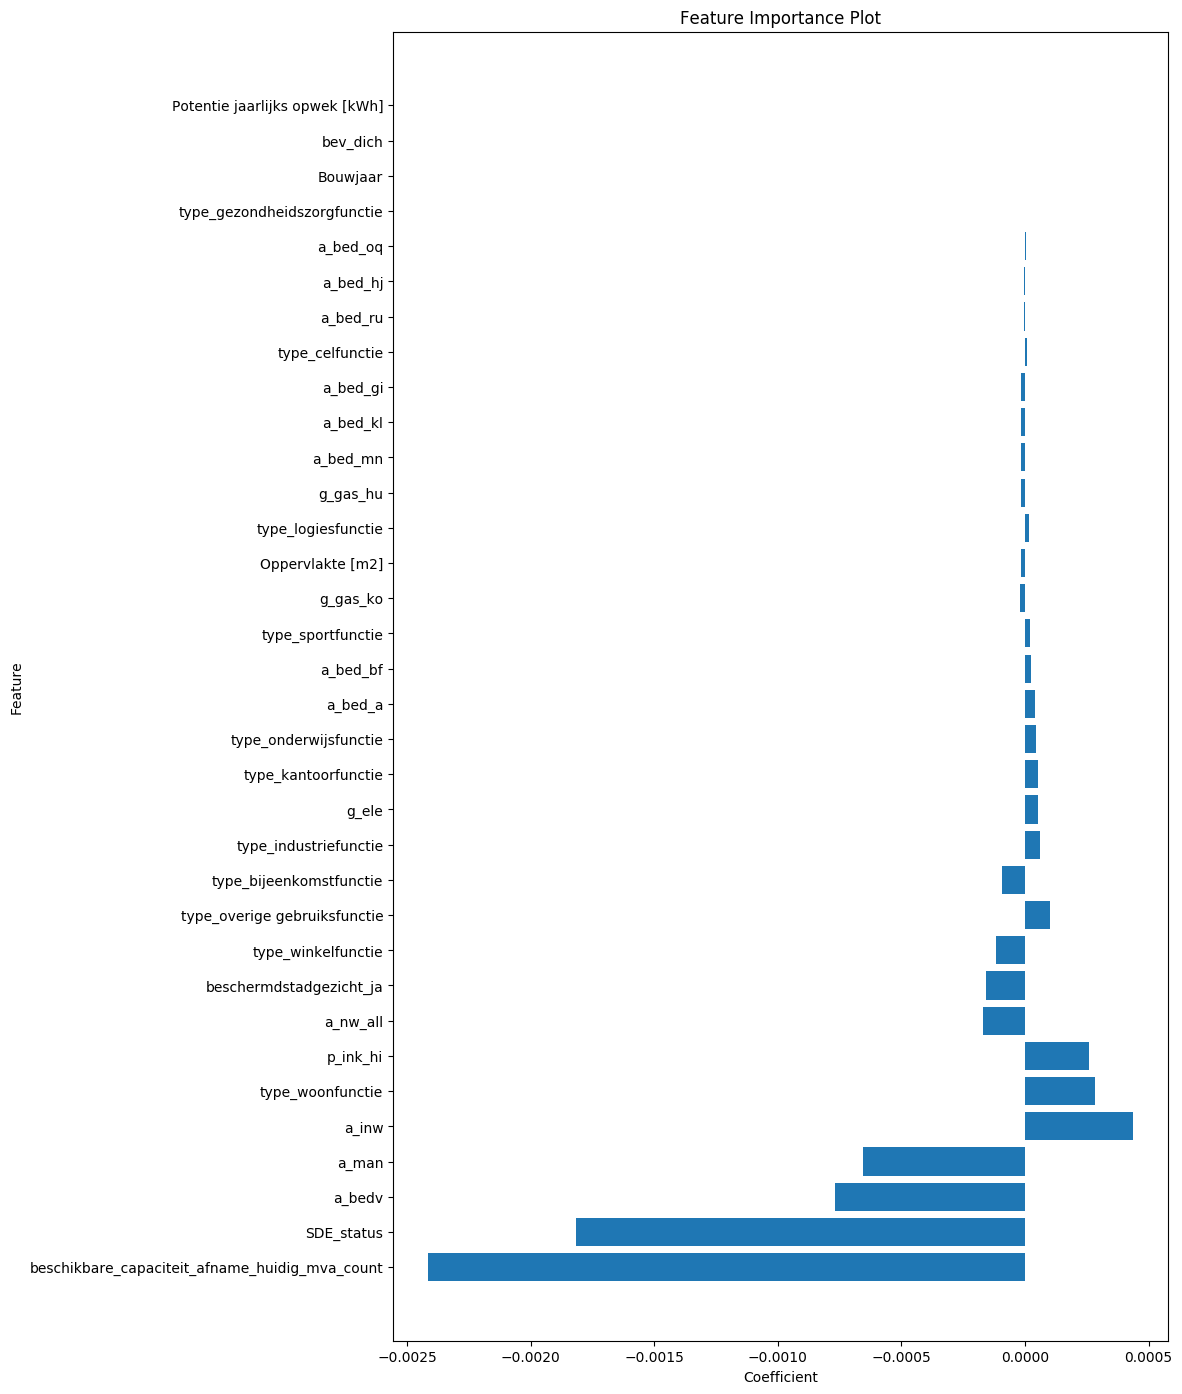

In [164]:
features, coefficients = zip(*feature_importances)

# create a horizontal barplot with the feature names on the y-axis and the coefficients on the x-axis
fig, ax = plt.subplots(figsize=(10, len(features) * 0.5))
ax.barh(features, coefficients)

# set the axis labels and title
ax.set_xlabel('Coefficient')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance Plot')

# show the plot
plt.show()

## Best model RF - Undersampling 0.5 + oversampling 0.5

In [165]:
best_rf = mod_rf_uo_best.best_estimator_
best_rf

Pipeline(steps=[('oversampling', RandomOverSampler(sampling_strategy=0.5)),
                ('undersampling', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification',
                 RandomForestClassifier(bootstrap=False, max_depth=5,
                                        n_estimators=20))])

In [173]:
perm_importance = permutation_importance(mod_rf_uo_best, X_test, y_test)

In [176]:
perm_importance

{'importances_mean': array([-3.13338820e-05,  4.99348926e-02,  1.25180465e-03, -2.21974245e-04,
         7.94439902e-02,  4.61250861e-03, -3.04471750e-03,  1.12523202e-02,
         6.26080738e-04,  7.47223780e-04, -9.91705554e-05,  7.26790250e-04,
         4.29657276e-04,  1.69169850e-03,  1.04025794e-03, -3.42511589e-04,
         2.17713114e-03,  2.14956801e-03,  3.90175310e-03,  3.29205799e-03,
         2.13667117e-03, -3.72587471e-04, -1.18064645e-04,  7.69318207e-04,
         0.00000000e+00,  0.00000000e+00,  1.85374969e-03,  1.38715218e-03,
        -7.08091060e-07,  1.62544587e-04, -1.00279732e-03,  3.14333316e-04,
         1.87061904e-04,  5.70758767e-03]),
 'importances_std': array([2.82339889e-04, 3.00494925e-03, 1.19806645e-03, 1.29384429e-03,
        6.97565418e-03, 2.18083981e-03, 1.67116846e-03, 4.48942936e-03,
        2.19377026e-04, 1.37148130e-03, 5.39253799e-04, 5.43860190e-04,
        1.14295559e-03, 2.33842210e-03, 2.07360613e-03, 9.15511219e-04,
        6.38035108e-0

In [249]:
X_train = X_train.drop(['SDE_status'], axis = 1)

In [250]:
X_train.columns

Index(['beschikbare_capaciteit_afname_huidig_mva_count', 'Bouwjaar', 'Oppervlakte [m2]', 'Potentie jaarlijks opwek [kWh]', 'a_bed_a', 'a_bed_bf', 'a_bed_gi', 'a_bed_hj', 'a_bed_kl', 'a_bed_mn', 'a_bed_oq', 'a_bed_ru', 'a_bedv', 'a_inw', 'a_man', 'a_nw_all', 'beschermdstadgezicht_ja', 'bev_dich', 'g_ele', 'g_gas_hu', 'g_gas_ko', 'p_ink_hi', 'type_bijeenkomstfunctie', 'type_celfunctie', 'type_gezondheidszorgfunctie', 'type_industriefunctie', 'type_kantoorfunctie', 'type_logiesfunctie', 'type_onderwijsfunctie', 'type_overige gebruiksfunctie', 'type_sportfunctie', 'type_winkelfunctie', 'type_woonfunctie'], dtype='object')

In [252]:
feature_importances = get_feature_importance(models_rf[4], X_train.columns)
feature_importances

ValueError: arrays must all be same length

In [205]:
feature_importances = feature_importances.sort_values(by=['score'],ascending=False)
feature_importances

,feat,score
4,SDE_status,0.354015
1,Bouwjaar,0.161772
8,a_bed_hj,0.037048
18,bev_dich,0.034426
2,Oppervlakte [m2],0.033880
19,g_ele,0.032056
3,Potentie jaarlijks opwek [kWh],0.030435
12,a_bed_ru,0.028979
21,g_gas_ko,0.026746
11,a_bed_oq,0.024747


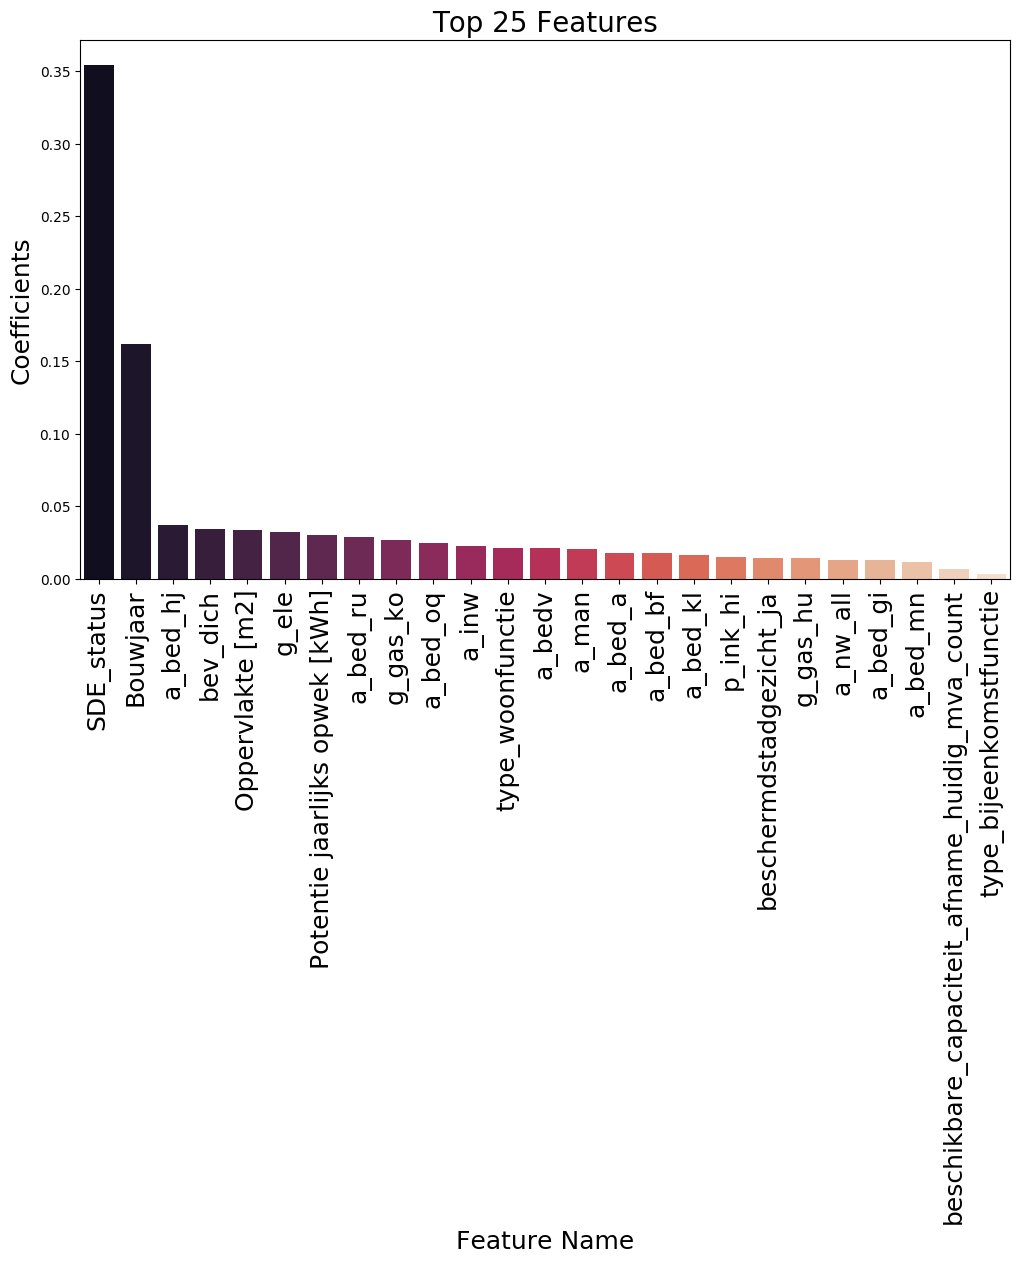

In [248]:
plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x="feat",
            y="score",
            data=feature_importances.head(25), palette = "rocket")
#plt.xticks(rotation=90)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
ax.set_title("Top 25 Features", fontsize=20)
ax.set_ylabel("Coefficients", fontsize=18)
ax.set_xlabel("Feature Name", fontsize=18)
plt.show()

In [0]:
# # Write recipe outputs
# Final4_baseline1 = dataiku.Dataset("Final4_baseline1")
# Final4_baseline1.write_with_schema(Final4_baseline1_df)